## Preparation stages

In [1]:
# Install hail if not available
!pip install hail

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.6/405.6 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.0 MB/s eta

In [2]:
#import hail package
import hail as hl
hl.init()

Running on Apache Spark version 3.5.3
SparkUI available at http://b6bb4c97a372:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.133-4c60fddb171a
LOGGING: writing to /content/hail-20241019-1017-0.2.133-4c60fddb171a.log


In [3]:
#import useful functions
from hail.plot import show
from pprint import pprint
hl.plot.output_notebook()

In [5]:
# Mount Google Drive because I saved the .VCF file in my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# confirm path
# !ls drive/MyDrive/final.vcf

In [7]:
# Recoding chromosome names from 'chr1', 'chr2', ..., 'chrX', 'chrY', 'chrM' to match the expected format for Hail's reference genome,
# then importing the VCF and writing it as a MatrixTable
# Kindly verify the file path '/home/anna/GWAS/final.vcf' in your device

recode = {f"chr{i}":f"{i}" for i in (list(range(1, 23)) + ['X', 'Y'])}
recode["chrM"] = "MT"
hl.import_vcf('drive/MyDrive/final.vcf', reference_genome='GRCh37', contig_recoding=recode).write('test.mt', overwrite=True)

2024-10-19 10:21:18.468 Hail: INFO: scanning VCF for sortedness...
2024-10-19 10:25:22.842 Hail: INFO: Coerced prefix-sorted VCF, requiring additional sorting within data partitions on each query.
2024-10-19 10:41:37.814 Hail: INFO: wrote matrix table with 633006 rows and 1373 columns in 135 partitions to test.mt


In [8]:
# read matrix table
mt = hl.read_matrix_table('test.mt')

In [9]:
#mt.cols().select().show(5)

In [10]:
mt.describe()

----------------------------------------
Global fields:
    None
----------------------------------------
Column fields:
    's': str
----------------------------------------
Row fields:
    'locus': locus<GRCh37>
    'alleles': array<str>
    'rsid': str
    'qual': float64
    'filters': set<str>
    'info': struct {
        AN: int32, 
        AC: array<int32>, 
        AF: array<float64>
    }
----------------------------------------
Entry fields:
    'GT': call
    'MCD': array<float64>
    'GenCallScore': array<float64>
----------------------------------------
Column key: ['s']
Row key: ['locus', 'alleles']
----------------------------------------


In [11]:
#Table with phenotypes
#I paid attention on "s" column because it contains unique identifiers for each individual in the dataset
import pandas as pd
df = pd.read_csv('drive/MyDrive/GWAS.csv', sep = '\t')
df

s  covariate  fen1  fen2  fen3   fen4   fen5   fen6 Height Weight
0    XV9529      21.79   NaN   NaN  10.0   50.0    NaN    NaN    153     51
1    DZ0262      18.87   4.0   3.0  15.0   27.0  178.0  204.0    166     52
2    FQ4293      18.37  10.0   5.0   1.0  100.0  195.0    NaN    165     50
3    HF8896      17.65   4.0   7.0   5.0   30.0  150.0  180.0    170     51
4    GT8455      29.38   3.0   3.0   NaN   35.0  200.0    NaN    165     80
..      ...        ...   ...   ...   ...    ...    ...    ...    ...    ...
585  GB3042      19.57   4.0   3.0   5.0   20.0  150.0  180.0    163     52
586  RL9184      17.65   7.0   4.0   0.0   20.0    NaN    NaN    170     51
587  XP3164        NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN
588  DI0279        NaN   3.0   2.0  30.0   50.0  160.0  170.0    NaN    NaN
589  VR6201        NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN

[590 rows x 10 columns]

## Calculate Body Mass Index (BMI):
<p> I chosed variant 16 using fen4 as the phenotype and BMI (calculated from Height and Weight) as the covariate.</p>
<p>I calculated the BMI for each individual from the given Height and Weight data using the formula:</p>

$$
BMI = \frac{Weight (kg)}{Height (m)^2}\
$$
<p> Since Height is in centimeters, you need to convert it to meters before applying the formula:</p>

$$
BMI = \frac{Weight}{(Height/100)^2}\
$$

In [12]:
import pandas as pd

# Convert Height and Weight columns to float64
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Calculate BMI (Height is converted from cm to meters)
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

In [13]:
# Convert column 's' to lower case
df['s'] = df['s'].str.lower()

In [14]:

# Remove all rows where BMI is missing (NaN)
df = df.dropna(subset=['covariate', 'fen4','BMI'])
df

s  covariate  fen1  fen2  fen3   fen4   fen5   fen6  Height  Weight  \
0    xv9529      21.79   NaN   NaN  10.0   50.0    NaN    NaN   153.0    51.0   
1    dz0262      18.87   4.0   3.0  15.0   27.0  178.0  204.0   166.0    52.0   
2    fq4293      18.37  10.0   5.0   1.0  100.0  195.0    NaN   165.0    50.0   
3    hf8896      17.65   4.0   7.0   5.0   30.0  150.0  180.0   170.0    51.0   
4    gt8455      29.38   3.0   3.0   NaN   35.0  200.0    NaN   165.0    80.0   
..      ...        ...   ...   ...   ...    ...    ...    ...     ...     ...   
580  yr2857      28.74  15.0   2.0  20.0   40.0    NaN    NaN   174.0    87.0   
582  ps8696      16.80   2.0   NaN   9.0   28.0  160.0  210.0   160.0    43.0   
584  bo4070      15.57   4.0   NaN  30.0   50.0    NaN    NaN   170.0    45.0   
585  gb3042      19.57   4.0   3.0   5.0   20.0  150.0  180.0   163.0    52.0   
586  rl9184      17.65   7.0   4.0   0.0   20.0    NaN    NaN   170.0    51.0   

           BMI  
0    21.786492  
1    18.870663  
2    18.365473  
3    17.647059  
4    29.384757  
..         ...  
580  28.735632  
582  16.796875  
584  15.570934  
585  19.571681  
586  17.647059  

[412 rows x 11 columns]

In [15]:
# Write the dataframe to a CSV file
df.to_csv('GWAS_fen4.csv', index=False, sep='\t', header=True)

In [16]:
# confirm GWAS_fen4.csv is in PWD
#!head GWAS_fen4.csv

In [17]:
# Read GWAS_fen4.csv into df1 to explore fen4 phynotype
df1 = pd.read_csv('GWAS_fen4.csv', sep = '\t')

In [18]:
df1

s  covariate  fen1  fen2  fen3   fen4   fen5   fen6  Height  Weight  \
0    xv9529      21.79   NaN   NaN  10.0   50.0    NaN    NaN   153.0    51.0   
1    dz0262      18.87   4.0   3.0  15.0   27.0  178.0  204.0   166.0    52.0   
2    fq4293      18.37  10.0   5.0   1.0  100.0  195.0    NaN   165.0    50.0   
3    hf8896      17.65   4.0   7.0   5.0   30.0  150.0  180.0   170.0    51.0   
4    gt8455      29.38   3.0   3.0   NaN   35.0  200.0    NaN   165.0    80.0   
..      ...        ...   ...   ...   ...    ...    ...    ...     ...     ...   
407  yr2857      28.74  15.0   2.0  20.0   40.0    NaN    NaN   174.0    87.0   
408  ps8696      16.80   2.0   NaN   9.0   28.0  160.0  210.0   160.0    43.0   
409  bo4070      15.57   4.0   NaN  30.0   50.0    NaN    NaN   170.0    45.0   
410  gb3042      19.57   4.0   3.0   5.0   20.0  150.0  180.0   163.0    52.0   
411  rl9184      17.65   7.0   4.0   0.0   20.0    NaN    NaN   170.0    51.0   

           BMI  
0    21.786492  
1    18.870663  
2    18.365473  
3    17.647059  
4    29.384757  
..         ...  
407  28.735632  
408  16.796875  
409  15.570934  
410  19.571681  
411  17.647059  

[412 rows x 11 columns]

<Axes: xlabel='fen4', ylabel='Count'>

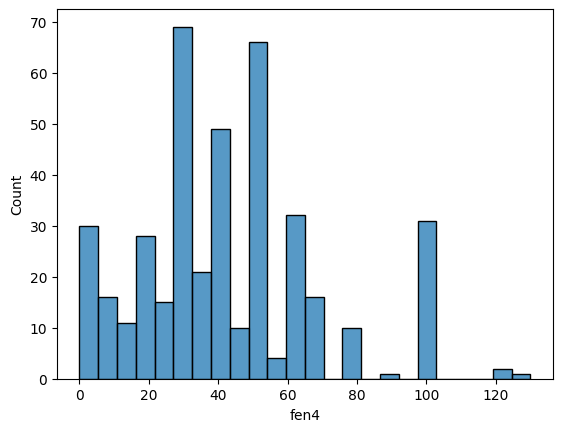

In [19]:
import seaborn as sns
sns.histplot(data = df1, x = 'fen4')

In [20]:
#check for mean value of phenotype
mean_value = df1['fen4'].mean()
mean_value

42.349514563106794

In [21]:
# check for standard deviation of fen4
std_value = df1['fen4'].std()
std_value

25.569221437539444

In [22]:
# Importing phenotype data from 'GWAS_fen4.csv', imputing column types, and keying the table by the sample identifier 's'

table1 = (hl.import_table('GWAS_fen4.csv', impute=True).key_by('s'))

2024-10-19 10:41:44.400 Hail: INFO: Reading table to impute column types
2024-10-19 10:41:48.300 Hail: INFO: Finished type imputation
  Loading field 's' as type str (imputed)
  Loading field 'covariate' as type float64 (imputed)
  Loading field 'fen1' as type str (imputed)
  Loading field 'fen2' as type str (imputed)
  Loading field 'fen3' as type str (imputed)
  Loading field 'fen4' as type float64 (imputed)
  Loading field 'fen5' as type str (imputed)
  Loading field 'fen6' as type str (imputed)
  Loading field 'Height' as type float64 (imputed)
  Loading field 'Weight' as type float64 (imputed)
  Loading field 'BMI' as type float64 (imputed)


In [23]:
# Check the table structure
table1.describe()

----------------------------------------
Global fields:
    None
----------------------------------------
Row fields:
    's': str 
    'covariate': float64 
    'fen1': str 
    'fen2': str 
    'fen3': str 
    'fen4': float64 
    'fen5': str 
    'fen6': str 
    'Height': float64 
    'Weight': float64 
    'BMI': float64 
----------------------------------------
Key: ['s']
----------------------------------------


In [24]:
# Check the table structure
table1.show()

+----------+-----------+--------+-------+--------+----------+---------+---------+----------+
| s        | covariate | fen1   | fen2  | fen3   |     fen4 | fen5    | fen6    |   Height |
+----------+-----------+--------+-------+--------+----------+---------+---------+----------+
| str      |   float64 | str    | str   | str    |  float64 | str     | str     |  float64 |
+----------+-----------+--------+-------+--------+----------+---------+---------+----------+
| "aa2790" |  1.87e+01 | "2.0"  | "6.0" | "0.0"  | 4.00e+01 | ""      | ""      | 1.70e+02 |
| "aa3194" |  2.31e+01 | "0.0"  | ""    | "1.0"  | 2.00e+01 | "100.0" | "110.0" | 1.60e+02 |
| "ab9398" |  1.65e+01 | "5.0"  | "6.0" | "0.0"  | 5.00e+01 | ""      | ""      | 1.67e+02 |
| "ac1584" |  1.97e+01 | "0.0"  | "0.0" | "5.0"  | 3.00e+00 | "70.0"  | "80.0"  | 1.67e+02 |
| "ad2649" |  1.87e+01 | "4.0"  | "6.0" | "9.0"  | 2.00e+01 | ""      | ""      | 1.62e+02 |
| "ag7637" |  1.82e+01 | ""     | "3.0" | "10.0" | 3.00e+01 | ""      | ""      | 1.69e+02 |
| "ah4708" |  1.98e+01 | "0.67" | "6.0" | "30.0" | 3.50e+01 | ""      | ""      | 1.71e+02 |
| "ai7015" |  2.32e+01 | "4.0"  | "2.0" | "4.0"  | 2.50e+01 | ""      | ""      | 1.61e+02 |
| "aj8095" |  2.27e+01 | "5.0"  | "7.0" | "50.0" | 1.00e+02 | "170.0" | ""      | 1.72e+02 |
| "an4891" |  2.07e+01 | "0.5"  | "7.0" | "0.0"  | 5.00e+01 | ""      | ""      | 1.63e+02 |
+----------+-----------+--------+-------+--------+----------+---------+---------+----------+

+----------+----------+
|   Weight |      BMI |
+----------+----------+
|  float64 |  float64 |
+----------+----------+
| 5.40e+01 | 1.87e+01 |
| 5.90e+01 | 2.30e+01 |
| 4.60e+01 | 1.65e+01 |
| 5.50e+01 | 1.97e+01 |
| 4.90e+01 | 1.87e+01 |
| 5.20e+01 | 1.82e+01 |
| 5.80e+01 | 1.98e+01 |
| 6.00e+01 | 2.31e+01 |
| 6.70e+01 | 2.26e+01 |
| 5.50e+01 | 2.07e+01 |
+----------+----------+
showing top 10 rows

In [25]:
# here we join mt to our table phenotype
mt = mt.annotate_cols(pheno=table1[mt.s])

In [26]:
# show columns of mt
mt.cols().show()

2024-10-19 10:41:51.645 Hail: WARN: cols(): Resulting column table is sorted by 'col_key'.
    To preserve matrix table column order, first unkey columns with 'key_cols_by()'
2024-10-19 10:41:53.656 Hail: INFO: Coerced sorted dataset


+----------+-----------------+------------+------------+------------+------------+------------+
| s        | pheno.covariate | pheno.fen1 | pheno.fen2 | pheno.fen3 | pheno.fen4 | pheno.fen5 |
+----------+-----------------+------------+------------+------------+------------+------------+
| str      |         float64 | str        | str        | str        |    float64 | str        |
+----------+-----------------+------------+------------+------------+------------+------------+
| "aa2139" |              NA | NA         | NA         | NA         |         NA | NA         |
| "aa2790" |        1.87e+01 | "2.0"      | "6.0"      | "0.0"      |   4.00e+01 | ""         |
| "aa3194" |        2.31e+01 | "0.0"      | ""         | "1.0"      |   2.00e+01 | "100.0"    |
| "ab5644" |              NA | NA         | NA         | NA         |         NA | NA         |
| "ab9117" |              NA | NA         | NA         | NA         |         NA | NA         |
| "ab9398" |        1.65e+01 | "5.0"      | "6.0"      | "0.0"      |   5.00e+01 | ""         |
| "ac0685" |              NA | NA         | NA         | NA         |         NA | NA         |
| "ac1584" |        1.97e+01 | "0.0"      | "0.0"      | "5.0"      |   3.00e+00 | "70.0"     |
| "ac6385" |              NA | NA         | NA         | NA         |         NA | NA         |
| "ad2649" |        1.87e+01 | "4.0"      | "6.0"      | "9.0"      |   2.00e+01 | ""         |
+----------+-----------------+------------+------------+------------+------------+------------+

+------------+--------------+--------------+-----------+
| pheno.fen6 | pheno.Height | pheno.Weight | pheno.BMI |
+------------+--------------+--------------+-----------+
| str        |      float64 |      float64 |   float64 |
+------------+--------------+--------------+-----------+
| NA         |           NA |           NA |        NA |
| ""         |     1.70e+02 |     5.40e+01 |  1.87e+01 |
| "110.0"    |     1.60e+02 |     5.90e+01 |  2.30e+01 |
| NA         |           NA |           NA |        NA |
| NA         |           NA |           NA |        NA |
| ""         |     1.67e+02 |     4.60e+01 |  1.65e+01 |
| NA         |           NA |           NA |        NA |
| "80.0"     |     1.67e+02 |     5.50e+01 |  1.97e+01 |
| NA         |           NA |           NA |        NA |
| ""         |     1.62e+02 |     4.90e+01 |  1.87e+01 |
+------------+--------------+--------------+-----------+
showing top 10 rows

In [27]:
mt.describe()

----------------------------------------
Global fields:
    None
----------------------------------------
Column fields:
    's': str
    'pheno': struct {
        covariate: float64, 
        fen1: str, 
        fen2: str, 
        fen3: str, 
        fen4: float64, 
        fen5: str, 
        fen6: str, 
        Height: float64, 
        Weight: float64, 
        BMI: float64
    }
----------------------------------------
Row fields:
    'locus': locus<GRCh37>
    'alleles': array<str>
    'rsid': str
    'qual': float64
    'filters': set<str>
    'info': struct {
        AN: int32, 
        AC: array<int32>, 
        AF: array<float64>
    }
----------------------------------------
Entry fields:
    'GT': call
    'MCD': array<float64>
    'GenCallScore': array<float64>
----------------------------------------
Column key: ['s']
Row key: ['locus', 'alleles']
----------------------------------------


## Discriptive Statistics of fen4 and BMI

In [28]:
# Calculating summary statistics (mean, stdev, min, max) for the phenotype 'fen4' across all samples
mt.aggregate_cols(hl.agg.stats(mt.pheno.fen4))

Struct(mean=42.78446115288221, stdev=25.533479111486383, min=0.0, max=130.0, n=399, sum=17071.0)

In [29]:
# calculated bin size (max-min)/n^(1/2)
CC = mt.aggregate_cols(hl.expr.aggregators.hist(mt.pheno.fen4, 0, 130, 20)) #numbers are start, end, bins
plot = hl.plot.histogram(CC, legend='self-report score', title='Phynotype fen4')
show(plot)

In [30]:
# Calculating summary statistics (mean, stdev, min, max, etc.)
mt.aggregate_cols(hl.agg.stats(mt.pheno.BMI))

Struct(mean=21.64792745277056, stdev=3.899544473781982, min=14.500297441998812, max=40.39018442310623, n=399, sum=8637.523053655454)

In [31]:
# calculated bin size (max-min)/n^(1/2)
CC = mt.aggregate_cols(hl.expr.aggregators.hist(mt.pheno.BMI, 14, 42, 20)) #numbers are start, end, bins
plot = hl.plot.histogram(CC, legend='self-report score', title='Phynotype BMI')
show(plot)

## Quality Control

In [32]:
# Apply a special function for quality check
mt = hl.sample_qc(mt)
mt.describe()

----------------------------------------
Global fields:
    None
----------------------------------------
Column fields:
    's': str
    'pheno': struct {
        covariate: float64, 
        fen1: str, 
        fen2: str, 
        fen3: str, 
        fen4: float64, 
        fen5: str, 
        fen6: str, 
        Height: float64, 
        Weight: float64, 
        BMI: float64
    }
    'sample_qc': struct {
        call_rate: float64, 
        n_called: int64, 
        n_not_called: int64, 
        n_filtered: int64, 
        n_hom_ref: int64, 
        n_het: int64, 
        n_hom_var: int64, 
        n_non_ref: int64, 
        n_singleton: int64, 
        n_snp: int64, 
        n_insertion: int64, 
        n_deletion: int64, 
        n_transition: int64, 
        n_transversion: int64, 
        n_star: int64, 
        r_ti_tv: float64, 
        r_het_hom_var: float64, 
        r_insertion_deletion: float64
    }
----------------------------------------
Row fields:
    'locus': locu

In [33]:
# call rate - in how many participants (in %) this SNP was genotyped
# call rate 1 means that SNP was genotyped for everyone in the sample
# SNPs with low call rates (for instance, below 90%) should be excluded

plot = hl.plot.histogram(mt.sample_qc.call_rate, range=(.95, 1), legend='Call Rate')
show(plot)

# We will not filter out any data but just used this plot to show


In [34]:
# Filter to retain samples with call rate between 0.95 and 1
mt_filtered = mt.filter_cols((mt.sample_qc.call_rate >= 0.95) & (mt.sample_qc.call_rate <= 1.0))

# Plot the filtered call rate
plot = hl.plot.histogram(mt_filtered.sample_qc.call_rate, range=(.95, 1), legend='Call Rate')
show(plot)

In [35]:
# Apply variant quality control measures
mt = hl.variant_qc(mt_filtered)

In [36]:
# Remove variants with minor allele frequency less than 1%
# keep variants with frequency higher than 0.01
# ensures that variant frequency is high enough to have statistical power for detection.
mt = mt.filter_rows(mt.variant_qc.AF[1] > 0.01)



In [37]:
# Remove variants that deviate from Hardy-Weinberg equilibrium
mt = mt.filter_rows(mt.variant_qc.p_value_hwe > 1e-6)

In [38]:
# Print the number of samples and variants remaining
print(f"Samples: {mt.count_cols()} Variants: {mt.count_rows()}")


Samples: 1371 Variants: 429308


In [39]:
# Check how many samples have missing values for the phenotype 'fen4'
mt_missing_phenotype = mt.filter_cols(hl.is_missing(mt.pheno.fen4))
num_missing_phenotype = mt_missing_phenotype.count_cols()
print(f"Number of samples missing phenotype 'fen4': {num_missing_phenotype}")

# Check how many samples have missing values for the covariate 'BMI'
mt_missing_covariate = mt.filter_cols(hl.is_missing(mt.pheno.BMI))
num_missing_covariate = mt_missing_covariate.count_cols()
print(f"Number of samples missing covariate 'covariate': {num_missing_covariate}")

Number of samples missing phenotype 'fen4': 973
Number of samples missing covariate 'covariate': 973


In [40]:
# # Filter out samples in mt with missing phenotype or covariate data
mt = mt.filter_cols(hl.is_defined(mt.pheno.fen4) & hl.is_defined(mt.pheno.BMI))


In [41]:
# GWAS without any covariates
gwas = hl.linear_regression_rows(
    y=mt.pheno.fen4,
    x=mt.GT.n_alt_alleles(),
    covariates=[1.0]  # Only the intercept term
)


# Describe the resulting GWAS table
gwas.row.describe()


2024-10-19 11:00:45.560 Hail: INFO: linear_regression_rows: running on 398 samples for 1 response variable y,
    with input variable x, and 1 additional covariate...


--------------------------------------------------------
Type:
        struct {
        locus: locus<GRCh37>, 
        alleles: array<str>, 
        n: int32, 
        sum_x: float64, 
        y_transpose_x: float64, 
        beta: float64, 
        standard_error: float64, 
        t_stat: float64, 
        p_value: float64
    }
--------------------------------------------------------
Source:
Index:
    ['row']
--------------------------------------------------------


2024-10-19 11:03:24.689 Hail: INFO: wrote table with 429308 rows in 135 partitions to /tmp/persist_TableVi1uihbNEM


In [42]:
# Manhattan plot for GWAS results
plot = hl.plot.manhattan(gwas.p_value)
show(plot)

In [43]:
# QQ plot for p-values to assess inflation
plot = hl.plot.qq(gwas.p_value)
show(plot)

2024-10-19 11:03:44.522 Hail: INFO: Ordering unsorted dataset with network shuffle
2024-10-19 11:05:00.264 Hail: INFO: Ordering unsorted dataset with network shuffle


In [44]:
# GWAS with a covariate (BMI)
gwas = hl.linear_regression_rows(
    y=mt.pheno.fen4,
    x=mt.GT.n_alt_alleles(),
    covariates=[1.0, mt.pheno.BMI]  # Intercept term and BMI as a covariate
)

2024-10-19 11:07:40.055 Hail: INFO: linear_regression_rows: running on 398 samples for 1 response variable y,
    with input variable x, and 2 additional covariates...
2024-10-19 11:10:00.081 Hail: INFO: wrote table with 429308 rows in 135 partitions to /tmp/persist_TableIxH6QGWZRy


In [45]:
# Plot Manhattan plot of GWAS p-values
plot = hl.plot.manhattan(gwas.p_value)
show(plot)

In [46]:
# Higher deviation from baseline model could be suspicious, indicating confounders

# Plot QQ plot of GWAS p-values for further inspection
plot = hl.plot.qq(gwas.p_value)
show(plot)

2024-10-19 11:10:16.066 Hail: INFO: Ordering unsorted dataset with network shuffle
2024-10-19 11:10:53.387 Hail: INFO: Ordering unsorted dataset with network shuffle


# Results

In [47]:
# Loading results and annotating fields
j = gwas.annotate(AF0 = mt.rows()[gwas.locus,gwas.alleles].variant_qc.AF[0])
j = j.annotate(AF1 = mt.rows()[j.locus,j.alleles].variant_qc.AF[1])
j = j.annotate(HWE_p_value = mt.rows()[j.locus,j.alleles].variant_qc.p_value_hwe)
j = j.annotate(het_freq_hwe = mt.rows()[j.locus,j.alleles].variant_qc.het_freq_hwe)
j = j.annotate(homozygote_count = mt.rows()[j.locus,j.alleles].variant_qc.homozygote_count)
j = j.annotate(AC = mt.rows()[j.locus,j.alleles].variant_qc.AC)


# Display the annotated results
j.show()

+---------------+------------+-------+----------+---------------+-----------+----------------+
| locus         | alleles    |     n |    sum_x | y_transpose_x |      beta | standard_error |
+---------------+------------+-------+----------+---------------+-----------+----------------+
| locus<GRCh37> | array<str> | int32 |  float64 |       float64 |   float64 |        float64 |
+---------------+------------+-------+----------+---------------+-----------+----------------+
| 1:752721      | ["A","G"]  |   398 | 6.11e+02 |      2.60e+04 | -4.02e-01 |       2.17e+00 |
| 1:759036      | ["G","A"]  |   398 | 2.51e+01 |      1.16e+03 |  4.10e+00 |       5.26e+00 |
| 1:801536      | ["T","G"]  |   398 | 9.00e+00 |      3.87e+02 |  1.33e-01 |       8.60e+00 |
| 1:838555      | ["C","A"]  |   398 | 2.25e+02 |      9.33e+03 | -1.83e+00 |       2.05e+00 |
| 1:838665      | ["T","C"]  |   398 | 3.30e+01 |      1.44e+03 |  1.04e+00 |       4.49e+00 |
| 1:840753      | ["T","C"]  |   398 | 3.42e+02 |      1.47e+04 |  4.80e-01 |       1.81e+00 |
| 1:851390      | ["G","T"]  |   398 | 1.73e+01 |      7.01e+02 | -2.14e+00 |       6.32e+00 |
| 1:854250      | ["A","G"]  |   398 | 1.38e+02 |      5.61e+03 | -2.53e+00 |       2.45e+00 |
| 1:861808      | ["A","G"]  |   398 | 7.08e+02 |      3.04e+04 |  2.87e+00 |       2.87e+00 |
| 1:866893      | ["T","C"]  |   398 | 4.11e+02 |      1.76e+04 |  5.00e-01 |       1.88e+00 |
+---------------+------------+-------+----------+---------------+-----------+----------------+

+-----------+----------+----------+----------+-------------+--------------+------------------+
|    t_stat |  p_value |      AF0 |      AF1 | HWE_p_value | het_freq_hwe | homozygote_count |
+-----------+----------+----------+----------+-------------+--------------+------------------+
|   float64 |  float64 |  float64 |  float64 |     float64 |      float64 | array<int32>     |
+-----------+----------+----------+----------+-------------+--------------+------------------+
| -1.85e-01 | 8.53e-01 | 2.19e-01 | 7.81e-01 |    8.08e-03 |     3.42e-01 | [49,819]         |
|  7.78e-01 | 4.37e-01 | 9.62e-01 | 3.80e-02 |    1.93e-01 |     7.32e-02 | [1264,0]         |
|  1.55e-02 | 9.88e-01 | 9.84e-01 | 1.64e-02 |    1.78e-01 |     3.23e-02 | [1327,1]         |
| -8.94e-01 | 3.72e-01 | 7.31e-01 | 2.69e-01 |    6.99e-01 |     3.93e-01 | [702,97]         |
|  2.32e-01 | 8.16e-01 | 9.70e-01 | 3.03e-02 |    2.40e-01 |     5.87e-02 | [1290,2]         |
|  2.65e-01 | 7.91e-01 | 5.77e-01 | 4.23e-01 |    5.25e-01 |     4.88e-01 | [450,239]        |
| -3.39e-01 | 7.34e-01 | 9.81e-01 | 1.89e-02 |    6.91e-01 |     3.71e-02 | [1297,0]         |
| -1.03e+00 | 3.02e-01 | 8.35e-01 | 1.65e-01 |    1.43e-01 |     2.75e-01 | [910,42]         |
|  9.99e-01 | 3.18e-01 | 8.94e-02 | 9.11e-01 |    9.34e-01 |     1.63e-01 | [11,1137]        |
|  2.66e-01 | 7.90e-01 | 4.58e-01 | 5.42e-01 |    5.31e-01 |     4.97e-01 | [281,395]        |
+-----------+----------+----------+----------+-------------+--------------+------------------+

+--------------+
| AC           |
+--------------+
| array<int32> |
+--------------+
| [600,2140]   |
| [2632,104]   |
| [2697,45]    |
| [1914,704]   |
| [2659,83]    |
| [1581,1159]  |
| [2645,51]    |
| [2162,426]   |
| [245,2497]   |
| [1253,1481]  |
+--------------+
showing top 10 rows

In [48]:
# Filter for significant p-values and convert to pandas DataFrame
df1 = j.filter(j.p_value < 0.001).to_pandas()

# Display the DataFrame
df1

locus alleles    n       sum_x  y_transpose_x       beta  \
0     1:18310576  [C, T]  398  162.402299    7583.229885  10.448555   
1     1:54042889  [C, T]  398       676.0        27961.0  -8.993869   
2     1:55462380  [T, C]  398    45.11335    2506.934509  13.864809   
3     1:59319508  [C, T]  398       215.0         8117.0  -7.380215   
4     1:59330763  [G, A]  398  214.617722    8117.101266  -7.311955   
..           ...     ...  ...         ...            ...        ...   
508  22:34090440  [T, C]  398   23.057935    1377.476071  18.089414   
509  22:42480007  [C, T]  398    4.124352     405.751295  58.602174   
510  22:44506233  [C, T]  398        20.0         1273.0  22.063071   
511  22:44511918  [C, T]  398        22.0         1318.0  18.286182   
512  22:45253464  [G, A]  398   60.114583    3201.677083  10.873249   

     standard_error    t_stat   p_value       AF0       AF1  HWE_p_value  \
0          3.147093  3.320065  0.000984  0.804598  0.195402     0.038967   
1          2.564192 -3.507487  0.000504  0.152666  0.847334     0.566218   
2          3.876028  3.577066  0.000391  0.953812  0.046188      0.88162   
3           2.09994 -3.514489  0.000492  0.728301  0.271699     0.037432   
4          2.106222 -3.471597  0.000575  0.729351  0.270649     0.068406   
..              ...       ...       ...       ...       ...          ...   
508        5.402146   3.34856   0.00089  0.971345  0.028655     0.812202   
509       12.479329  4.695939  0.000004  0.989023  0.010977      0.07668   
510        5.741903  3.842466  0.000142  0.971147  0.028853     0.468473   
511        5.513937  3.316357  0.000996  0.970095  0.029905     0.487165   
512        3.267949   3.32724  0.000959  0.929119  0.070881     0.001754   

     het_freq_hwe homozygote_count           AC  
0        0.315044        [174, 15]   [420, 102]  
1        0.258813        [29, 980]  [418, 2320]  
2        0.088141        [1240, 2]  [2602, 126]  
3        0.395902        [712, 86]  [1997, 745]  
4        0.394942        [708, 86]  [1978, 734]  
..            ...              ...          ...  
508      0.055689        [1284, 1]   [2644, 78]  
509       0.02172        [1293, 1]   [2613, 29]  
510      0.056062        [1290, 0]   [2659, 79]  
511      0.058043        [1289, 0]   [2660, 82]  
512      0.131765       [1135, 15]  [2425, 185]  

[513 rows x 15 columns]

In [49]:
# Sort the DataFrame by p_value
df1 = df1.sort_values('p_value')

# Display the sorted DataFrame
df1

locus alleles    n      sum_x  y_transpose_x       beta  \
280  9:121775579  [A, G]  398  19.389744     1386.34359  30.867508   
161   5:85817688  [C, T]  398       14.0         1059.0  34.160208   
257   9:13381524  [T, G]  398        8.0          685.0  43.703081   
238    8:4122438  [C, A]  398       18.0         1265.0  28.936567   
262   9:23605049  [C, T]  398  20.050378    1369.267003   26.93454   
..           ...     ...  ...        ...            ...        ...   
421  15:81239712  [A, G]  398  32.214099    1845.569191  14.642859   
190  6:108281713  [T, C]  398   186.5625     7298.40625 -10.605414   
417  15:74015297  [A, G]  398   7.035354     519.414141  31.806278   
445  17:27182944  [G, A]  398      590.0        24144.0  -6.786163   
511  22:44511918  [C, T]  398       22.0         1318.0  18.286182   

     standard_error    t_stat   p_value       AF0       AF1  HWE_p_value  \
280        5.792384  5.328982       0.0  0.984951  0.015049     0.145398   
161        6.718253  5.084686  0.000001  0.982482  0.017518     0.671136   
257        8.838521  4.944615  0.000001    0.9876    0.0124     0.101877   
238        5.972663  4.844835  0.000002  0.980306  0.019694     0.706374   
262        5.702326   4.72343  0.000003  0.973935  0.026065     0.419576   
..              ...       ...       ...       ...       ...          ...   
421         4.41244   3.31854  0.000989  0.959397  0.040603     0.010083   
190        3.196549  -3.31777  0.000992  0.775591  0.224409     0.023861   
417        9.587571  3.317449  0.000993  0.985348  0.014652     0.017006   
445        2.045685 -3.317306  0.000993  0.255848  0.744152      0.69643   
511        5.513937  3.316357  0.000996  0.970095  0.029905     0.487165   

     het_freq_hwe homozygote_count           AC  
280      0.029656        [1290, 1]   [2618, 40]  
161      0.034435        [1322, 0]   [2692, 48]  
257      0.024501        [1338, 1]   [2708, 34]  
238      0.038626        [1317, 0]   [2688, 54]  
262      0.050789        [1292, 1]   [2653, 71]  
..            ...              ...          ...  
421      0.077939        [1194, 6]  [2481, 105]  
190      0.348786        [159, 19]   [394, 114]  
417      0.028885        [1327, 2]   [2690, 40]  
445      0.380919        [92, 760]  [700, 2036]  
511      0.058043        [1289, 0]   [2660, 82]  

[513 rows x 15 columns]

In [86]:
# Save to Excel file
df1.to_excel('GWAS_results_best_model.xlsx', index=False)

## First SNP with lowest p-value

In [112]:
# This is our significant SNP
# I picked a random SNP of interest since fen4 is unknown
snp_of_interest = hl.locus("9", 121775579)

In [113]:
# Filter the matrix table for the SNP
mt_filtered = mt.filter_rows(mt.locus == snp_of_interest)

In [114]:
# Create a table from matrix table
ht = mt_filtered.entries()

In [115]:
ht.show(5)

+---------------+------------+--------------+---------+----------+---------+--------------+
| locus         | alleles    | rsid         |    qual | filters  | info.AN | info.AC      |
+---------------+------------+--------------+---------+----------+---------+--------------+
| locus<GRCh37> | array<str> | str          | float64 | set<str> |   int32 | array<int32> |
+---------------+------------+--------------+---------+----------+---------+--------------+
| 9:121775579   | ["A","G"]  | "rs76728852" |      NA | {}       |    2662 | [40]         |
| 9:121775579   | ["A","G"]  | "rs76728852" |      NA | {}       |    2662 | [40]         |
| 9:121775579   | ["A","G"]  | "rs76728852" |      NA | {}       |    2662 | [40]         |
| 9:121775579   | ["A","G"]  | "rs76728852" |      NA | {}       |    2662 | [40]         |
| 9:121775579   | ["A","G"]  | "rs76728852" |      NA | {}       |    2662 | [40]         |
+---------------+------------+--------------+---------+----------+---------+--------------+

+----------------+---------------+---------------------+---------------+
| info.AF        | variant_qc.AC | variant_qc.AF       | variant_qc.AN |
+----------------+---------------+---------------------+---------------+
| array<float64> | array<int32>  | array<float64>      |         int32 |
+----------------+---------------+---------------------+---------------+
| [1.50e-02]     | [2618,40]     | [9.85e-01,1.50e-02] |          2658 |
| [1.50e-02]     | [2618,40]     | [9.85e-01,1.50e-02] |          2658 |
| [1.50e-02]     | [2618,40]     | [9.85e-01,1.50e-02] |          2658 |
| [1.50e-02]     | [2618,40]     | [9.85e-01,1.50e-02] |          2658 |
| [1.50e-02]     | [2618,40]     | [9.85e-01,1.50e-02] |          2658 |
+----------------+---------------+---------------------+---------------+

+-----------------------------+----------------------+---------------------+
| variant_qc.homozygote_count | variant_qc.call_rate | variant_qc.n_called |
+-----------------------------+----------------------+---------------------+
| array<int32>                |              float64 |               int64 |
+-----------------------------+----------------------+---------------------+
| [1290,1]                    |             9.69e-01 |                1329 |
| [1290,1]                    |             9.69e-01 |                1329 |
| [1290,1]                    |             9.69e-01 |                1329 |
| [1290,1]                    |             9.69e-01 |                1329 |
| [1290,1]                    |             9.69e-01 |                1329 |
+-----------------------------+----------------------+---------------------+

+-------------------------+-----------------------+------------------+----------------------+
| variant_qc.n_not_called | variant_qc.n_filtered | variant_qc.n_het | variant_qc.n_non_ref |
+-------------------------+-----------------------+------------------+----------------------+
|                   int64 |                 int64 |            int64 |                int64 |
+-------------------------+-----------------------+------------------+----------------------+
|                      42 |                     0 |               38 |                   39 |
|                      42 |                     0 |               38 |                   39 |
|                      42 |                     0 |               38 |                   39 |
|                      42 |                     0 |               38 |                   39 |
|                      42 |                     0 |               38 |                   39 |
+-------------------------+-----------------------+------------------+----------------------+

+-------------------------+------------------------+-------------------------------+----------+
| variant_qc.het_freq_hwe | variant_qc.p_value_hwe | variant_qc.p_value_excess_het | s        |
+-------------------------+------------------------+-------------------------------+----------+
|           

In [116]:
# Convert the Hail table to a pandas DataFrame
df2 = ht.to_pandas()


In [117]:
# Convert the 'GT' field to string in the DataFrame
df2['GT'] = df2['GT'].astype(str)

In [118]:
df2

locus alleles        rsid  qual filters  info.AN info.AC  \
0    9:121775579  [A, G]  rs76728852  <NA>      {}     2662    [40]   
1    9:121775579  [A, G]  rs76728852  <NA>      {}     2662    [40]   
2    9:121775579  [A, G]  rs76728852  <NA>      {}     2662    [40]   
3    9:121775579  [A, G]  rs76728852  <NA>      {}     2662    [40]   
4    9:121775579  [A, G]  rs76728852  <NA>      {}     2662    [40]   
..           ...     ...         ...   ...     ...      ...     ...   
393  9:121775579  [A, G]  rs76728852  <NA>      {}     2662    [40]   
394  9:121775579  [A, G]  rs76728852  <NA>      {}     2662    [40]   
395  9:121775579  [A, G]  rs76728852  <NA>      {}     2662    [40]   
396  9:121775579  [A, G]  rs76728852  <NA>      {}     2662    [40]   
397  9:121775579  [A, G]  rs76728852  <NA>      {}     2662    [40]   

         info.AF variant_qc.AC                               variant_qc.AF  \
0    [0.0150263]    [2618, 40]  [0.9849510910458992, 0.015048908954100828]   
1    [0.0150263]    [2618, 40]  [0.9849510910458992, 0.015048908954100828]   
2    [0.0150263]    [2618, 40]  [0.9849510910458992, 0.015048908954100828]   
3    [0.0150263]    [2618, 40]  [0.9849510910458992, 0.015048908954100828]   
4    [0.0150263]    [2618, 40]  [0.9849510910458992, 0.015048908954100828]   
..           ...           ...                                         ...   
393  [0.0150263]    [2618, 40]  [0.9849510910458992, 0.015048908954100828]   
394  [0.0150263]    [2618, 40]  [0.9849510910458992, 0.015048908954100828]   
395  [0.0150263]    [2618, 40]  [0.9849510910458992, 0.015048908954100828]   
396  [0.0150263]    [2618, 40]  [0.9849510910458992, 0.015048908954100828]   
397  [0.0150263]    [2618, 40]  [0.9849510910458992, 0.015048908954100828]   

     ...  sample_qc.n_deletion sample_qc.n_transition  \
0    ...                    59                 173426   
1    ...                    53                 173507   
2    ...                    52                 171635   
3    ...                    43                 169129   
4    ...                    53                 164240   
..   ...                   ...                    ...   
393  ...                    55                 173404   
394  ...                    51                 172384   
395  ...                    50                 171337   
396  ...                    58                 174473   
397  ...                    47                 174461   

     sample_qc.n_transversion  sample_qc.n_star  sample_qc.r_ti_tv  \
0                       42595                 0           4.071511   
1                       42632                 0           4.069877   
2                       42602                 0           4.028801   
3                       41512                 0            4.07422   
4                       40347                 0           4.070687   
..                        ...               ...                ...   
393                     42739                 0           4.057278   
394                     42510                 0            4.05514   
395                     41998                 0           4.079647   
396                     43006                 0           4.056946   
397                     43321                 0           4.027169   

     sample_qc.r_het_hom_var  sample_qc.r_insertion_deletion    GT        MCD  \
0                   1.867618                        0.457627   0/1  [2.79002]   
1                   1.884286                        0.358491   0/0  [1.51266]   
2                   1.842301                        0.403846   0/0  [3.55123]   
3                   1.759604                         0.55814   0/0  [2.69882]   
4                   1.620182                        0.528302   0/0  [6.84839]   
..                       ...                             ...   ...        ...   
393                 1.867635                        0.472727   0/0  [1.36775]   
394                 1.803068                   

In [119]:
# Replace genotype coding to meaningful labels
df2['Genotype'] = df2['GT'].replace({'0/0': 'AA', '0/1': 'AG', '1/0': 'AG', '1/1': 'GG'})

<ipython-input-120-a60536c55392>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, y='pheno.fen4', x='Genotype', palette='plasma', saturation=1)


<Axes: xlabel='Genotype', ylabel='pheno.fen4'>

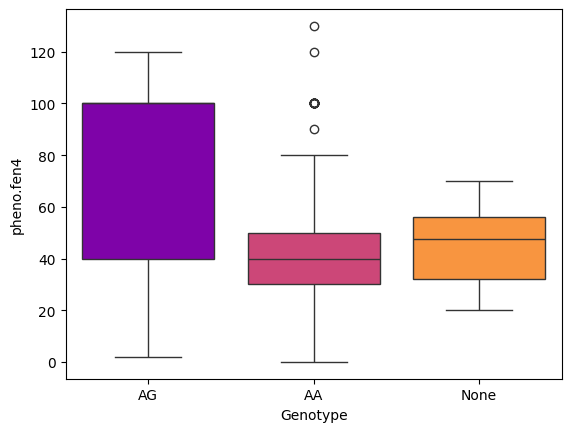

In [120]:
# Plot a boxplot of the phenotype 'fen4' against genotype
import seaborn as sns
sns.boxplot(data=df2, y='pheno.fen4', x='Genotype', palette='plasma', saturation=1)

In [121]:
AA = df2[df2['Genotype'] == 'AA']
GA = df2[df2['Genotype'] == 'AG']
GG = df2[df2['Genotype'] == 'GG']

In [122]:
# Mean count of homozygote across samples
print(AA['pheno.fen4'].mean())
print(GA['pheno.fen4'].mean())
print(GG['pheno.fen4'].mean())

41.094339622641506
72.05263157894737
<NA>


In [123]:
# Ttest
# I didn't calculate Ttest for GG and other homozygote because GG is NA
import scipy.stats as stats
stats.ttest_ind(AA['pheno.fen4'], GA['pheno.fen4'])

TtestResult(statistic=-5.323188750420391, pvalue=1.7292166736719347e-07, df=388.0)

## Second SNP with lowest p-value

In [124]:
# This is our significant SNP
# I picked a random SNP of interest since fen4 is unknown
snp_of_interest = hl.locus("5", 85817688)

In [125]:
# Filter the matrix table for the SNP
mt_filtered = mt.filter_rows(mt.locus == snp_of_interest)

In [126]:
# Create a table from matrix table
ht = mt_filtered.entries()

In [127]:
ht.show(5)

+---------------+------------+---------------+---------+----------+---------+--------------+
| locus         | alleles    | rsid          |    qual | filters  | info.AN | info.AC      |
+---------------+------------+---------------+---------+----------+---------+--------------+
| locus<GRCh37> | array<str> | str           | float64 | set<str> |   int32 | array<int32> |
+---------------+------------+---------------+---------+----------+---------+--------------+
| 5:85817688    | ["C","T"]  | "rs112244286" |      NA | {}       |    2744 | [48]         |
| 5:85817688    | ["C","T"]  | "rs112244286" |      NA | {}       |    2744 | [48]         |
| 5:85817688    | ["C","T"]  | "rs112244286" |      NA | {}       |    2744 | [48]         |
| 5:85817688    | ["C","T"]  | "rs112244286" |      NA | {}       |    2744 | [48]         |
| 5:85817688    | ["C","T"]  | "rs112244286" |      NA | {}       |    2744 | [48]         |
+---------------+------------+---------------+---------+----------+---------+--------------+

+----------------+---------------+---------------------+---------------+
| info.AF        | variant_qc.AC | variant_qc.AF       | variant_qc.AN |
+----------------+---------------+---------------------+---------------+
| array<float64> | array<int32>  | array<float64>      |         int32 |
+----------------+---------------+---------------------+---------------+
| [1.75e-02]     | [2692,48]     | [9.82e-01,1.75e-02] |          2740 |
| [1.75e-02]     | [2692,48]     | [9.82e-01,1.75e-02] |          2740 |
| [1.75e-02]     | [2692,48]     | [9.82e-01,1.75e-02] |          2740 |
| [1.75e-02]     | [2692,48]     | [9.82e-01,1.75e-02] |          2740 |
| [1.75e-02]     | [2692,48]     | [9.82e-01,1.75e-02] |          2740 |
+----------------+---------------+---------------------+---------------+

+-----------------------------+----------------------+---------------------+
| variant_qc.homozygote_count | variant_qc.call_rate | variant_qc.n_called |
+-----------------------------+----------------------+---------------------+
| array<int32>                |              float64 |               int64 |
+-----------------------------+----------------------+---------------------+
| [1322,0]                    |             9.99e-01 |                1370 |
| [1322,0]                    |             9.99e-01 |                1370 |
| [1322,0]                    |             9.99e-01 |                1370 |
| [1322,0]                    |             9.99e-01 |                1370 |
| [1322,0]                    |             9.99e-01 |                1370 |
+-----------------------------+----------------------+---------------------+

+-------------------------+-----------------------+------------------+----------------------+
| variant_qc.n_not_called | variant_qc.n_filtered | variant_qc.n_het | variant_qc.n_non_ref |
+-------------------------+-----------------------+------------------+----------------------+
|                   int64 |                 int64 |            int64 |                int64 |
+-------------------------+-----------------------+------------------+----------------------+
|                       1 |                     0 |               48 |                   48 |
|                       1 |                     0 |               48 |                   48 |
|                       1 |                     0 |               48 |                   48 |
|                       1 |                     0 |               48 |                   48 |
|                       1 |                     0 |               48 |                   48 |
+-------------------------+-----------------------+------------------+----------------------+

+-------------------------+------------------------+-------------------------------+----------+
| variant_qc.het_freq_hwe | variant_qc.p_value_hwe | variant_qc.p_value_excess_het | s        |
+-------------------------+------------------------+-------------------------------+----------+
|

In [130]:
# Convert the Hail table to a pandas DataFrame
df3 = ht.to_pandas()


In [132]:
# Convert the 'GT' field to string in the DataFrame
df3['GT'] = df3['GT'].astype(str)

In [133]:
df3

locus alleles         rsid  qual filters  info.AN info.AC  \
0    5:85817688  [C, T]  rs112244286  <NA>      {}     2744    [48]   
1    5:85817688  [C, T]  rs112244286  <NA>      {}     2744    [48]   
2    5:85817688  [C, T]  rs112244286  <NA>      {}     2744    [48]   
3    5:85817688  [C, T]  rs112244286  <NA>      {}     2744    [48]   
4    5:85817688  [C, T]  rs112244286  <NA>      {}     2744    [48]   
..          ...     ...          ...   ...     ...      ...     ...   
393  5:85817688  [C, T]  rs112244286  <NA>      {}     2744    [48]   
394  5:85817688  [C, T]  rs112244286  <NA>      {}     2744    [48]   
395  5:85817688  [C, T]  rs112244286  <NA>      {}     2744    [48]   
396  5:85817688  [C, T]  rs112244286  <NA>      {}     2744    [48]   
397  5:85817688  [C, T]  rs112244286  <NA>      {}     2744    [48]   

         info.AF variant_qc.AC                               variant_qc.AF  \
0    [0.0174927]    [2692, 48]  [0.9824817518248176, 0.017518248175182483]   
1    [0.0174927]    [2692, 48]  [0.9824817518248176, 0.017518248175182483]   
2    [0.0174927]    [2692, 48]  [0.9824817518248176, 0.017518248175182483]   
3    [0.0174927]    [2692, 48]  [0.9824817518248176, 0.017518248175182483]   
4    [0.0174927]    [2692, 48]  [0.9824817518248176, 0.017518248175182483]   
..           ...           ...                                         ...   
393  [0.0174927]    [2692, 48]  [0.9824817518248176, 0.017518248175182483]   
394  [0.0174927]    [2692, 48]  [0.9824817518248176, 0.017518248175182483]   
395  [0.0174927]    [2692, 48]  [0.9824817518248176, 0.017518248175182483]   
396  [0.0174927]    [2692, 48]  [0.9824817518248176, 0.017518248175182483]   
397  [0.0174927]    [2692, 48]  [0.9824817518248176, 0.017518248175182483]   

     ...  sample_qc.n_deletion sample_qc.n_transition  \
0    ...                    59                 173426   
1    ...                    53                 173507   
2    ...                    52                 171635   
3    ...                    43                 169129   
4    ...                    53                 164240   
..   ...                   ...                    ...   
393  ...                    55                 173404   
394  ...                    51                 172384   
395  ...                    50                 171337   
396  ...                    58                 174473   
397  ...                    47                 174461   

     sample_qc.n_transversion  sample_qc.n_star  sample_qc.r_ti_tv  \
0                       42595                 0           4.071511   
1                       42632                 0           4.069877   
2                       42602                 0           4.028801   
3                       41512                 0            4.07422   
4                       40347                 0           4.070687   
..                        ...               ...                ...   
393                     42739                 0           4.057278   
394                     42510                 0            4.05514   
395                     41998                 0           4.079647   
396                     43006                 0           4.056946   
397                     43321                 0           4.027169   

     sample_qc.r_het_hom_var  sample_qc.r_insertion_deletion   GT        MCD  \
0                   1.867618                        0.457627  0/0  [1.70053]   
1                   1.884286                        0.358491  0/0  [1.91259]   
2                   1.842301                        0.403846  0/0  [2.05761]   
3                   1.759604                         0.55814  0/0  [1.99339]   
4                   1.620182                        0.528302  0/0  [1.83346]   
..                       ...                             ...  ...        ...   
393                 1.867635                        0.472727  0/0  [1.82271]   
394                 1.803068                        0.

In [134]:
# Replace genotype coding to meaningful labels
df3['Genotype'] = df3['GT'].replace({'0/0': 'CC', '0/1': 'CT', '1/0': 'TC', '1/1': 'TT'})

<ipython-input-135-2284ffea0cb5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df3, y='pheno.fen4', x='Genotype', palette='plasma', saturation=1)


<Axes: xlabel='Genotype', ylabel='pheno.fen4'>

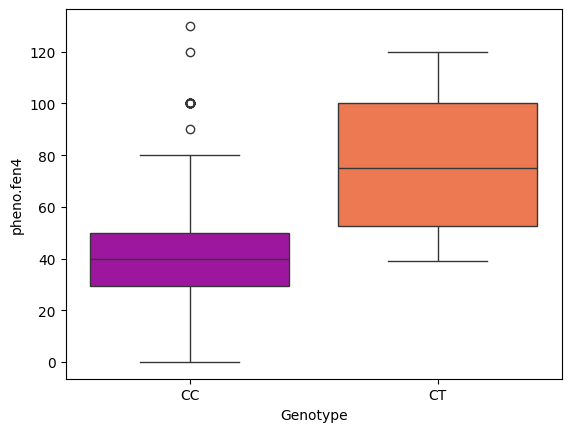

In [135]:
# Plot a boxplot of the phenotype 'fen4' against genotype
import seaborn as sns
sns.boxplot(data=df3, y='pheno.fen4', x='Genotype', palette='plasma', saturation=1)

In [136]:
CC = df3[df3['Genotype'] == 'CC']
CT = df3[df3['Genotype'] == 'CT']
TT = df3[df3['Genotype'] == 'TT']

In [137]:
# Homozygote mean across individuals
print(CC['pheno.fen4'].mean())
print(CT['pheno.fen4'].mean())
print(TT['pheno.fen4'].mean())

41.4375
75.64285714285714
<NA>


In [138]:
# Ttest
# I didn't calculate Ttest for TT and other homozygote because TT is NA
import scipy.stats as stats
stats.ttest_ind(CC['pheno.fen4'], CT['pheno.fen4'])

TtestResult(statistic=-5.095421428233661, pvalue=5.398054790899692e-07, df=396.0)

## Third SNP with the lowest p-value

In [139]:
# This is our significant SNP
# I picked a random SNP of interest since fen4 is unknown
snp_of_interest = hl.locus("9", 13381524)

In [140]:
# Filter the matrix table for the SNP
mt_filtered = mt.filter_rows(mt.locus == snp_of_interest)

In [141]:
# Create a table from matrix table
ht = mt_filtered.entries()

In [142]:
ht.show(5)

+---------------+------------+--------------+---------+----------+---------+--------------+
| locus         | alleles    | rsid         |    qual | filters  | info.AN | info.AC      |
+---------------+------------+--------------+---------+----------+---------+--------------+
| locus<GRCh37> | array<str> | str          | float64 | set<str> |   int32 | array<int32> |
+---------------+------------+--------------+---------+----------+---------+--------------+
| 9:13381524    | ["T","G"]  | "rs10961034" |      NA | {}       |    2746 | [34]         |
| 9:13381524    | ["T","G"]  | "rs10961034" |      NA | {}       |    2746 | [34]         |
| 9:13381524    | ["T","G"]  | "rs10961034" |      NA | {}       |    2746 | [34]         |
| 9:13381524    | ["T","G"]  | "rs10961034" |      NA | {}       |    2746 | [34]         |
| 9:13381524    | ["T","G"]  | "rs10961034" |      NA | {}       |    2746 | [34]         |
+---------------+------------+--------------+---------+----------+---------+--------------+

+----------------+---------------+---------------------+---------------+
| info.AF        | variant_qc.AC | variant_qc.AF       | variant_qc.AN |
+----------------+---------------+---------------------+---------------+
| array<float64> | array<int32>  | array<float64>      |         int32 |
+----------------+---------------+---------------------+---------------+
| [1.24e-02]     | [2708,34]     | [9.88e-01,1.24e-02] |          2742 |
| [1.24e-02]     | [2708,34]     | [9.88e-01,1.24e-02] |          2742 |
| [1.24e-02]     | [2708,34]     | [9.88e-01,1.24e-02] |          2742 |
| [1.24e-02]     | [2708,34]     | [9.88e-01,1.24e-02] |          2742 |
| [1.24e-02]     | [2708,34]     | [9.88e-01,1.24e-02] |          2742 |
+----------------+---------------+---------------------+---------------+

+-----------------------------+----------------------+---------------------+
| variant_qc.homozygote_count | variant_qc.call_rate | variant_qc.n_called |
+-----------------------------+----------------------+---------------------+
| array<int32>                |              float64 |               int64 |
+-----------------------------+----------------------+---------------------+
| [1338,1]                    |             1.00e+00 |                1371 |
| [1338,1]                    |             1.00e+00 |                1371 |
| [1338,1]                    |             1.00e+00 |                1371 |
| [1338,1]                    |             1.00e+00 |                1371 |
| [1338,1]                    |             1.00e+00 |                1371 |
+-----------------------------+----------------------+---------------------+

+-------------------------+-----------------------+------------------+----------------------+
| variant_qc.n_not_called | variant_qc.n_filtered | variant_qc.n_het | variant_qc.n_non_ref |
+-------------------------+-----------------------+------------------+----------------------+
|                   int64 |                 int64 |            int64 |                int64 |
+-------------------------+-----------------------+------------------+----------------------+
|                       0 |                     0 |               32 |                   33 |
|                       0 |                     0 |               32 |                   33 |
|                       0 |                     0 |               32 |                   33 |
|                       0 |                     0 |               32 |                   33 |
|                       0 |                     0 |               32 |                   33 |
+-------------------------+-----------------------+------------------+----------------------+

+-------------------------+------------------------+-------------------------------+----------+
| variant_qc.het_freq_hwe | variant_qc.p_value_hwe | variant_qc.p_value_excess_het | s        |
+-------------------------+------------------------+-------------------------------+----------+
|           

In [143]:
# Convert the Hail table to a pandas DataFrame
df4 = ht.to_pandas()


In [144]:
# Convert the 'GT' field to string in the DataFrame
df4['GT'] = df4['GT'].astype(str)

In [145]:
# Replace genotype coding to meaningful labels
df4['Genotype'] = df4['GT'].replace({'0/0': 'TT', '0/1': 'TG', '1/0': 'TG', '1/1': 'GG'})

<ipython-input-146-8eeb10285286>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df4, y='pheno.fen4', x='Genotype', palette='plasma', saturation=1)


<Axes: xlabel='Genotype', ylabel='pheno.fen4'>

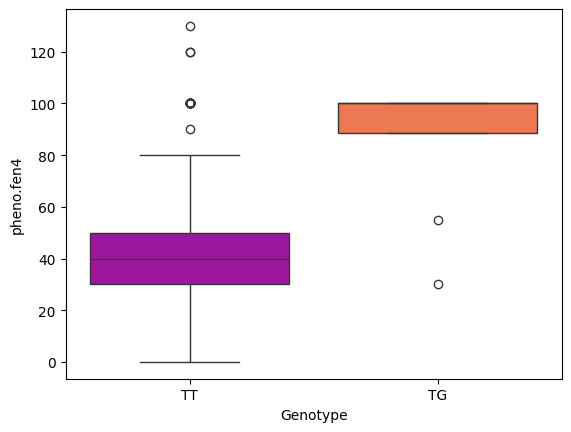

In [146]:
# Plot a boxplot of the phenotype 'fen4' against genotype
import seaborn as sns
sns.boxplot(data=df4, y='pheno.fen4', x='Genotype', palette='plasma', saturation=1)

In [147]:
TT = df4[df4['Genotype'] == 'TT']
GT = df4[df4['Genotype'] == 'TG']
GG = df4[df4['Genotype'] == 'GG']

In [148]:
# Mean of homozygote across sample
print(TT['pheno.fen4'].mean())
print(GT['pheno.fen4'].mean())
print(GG['pheno.fen4'].mean())

41.758974358974356
85.625
<NA>


In [149]:
# Ttest
# I didn't calculate Ttest for GG and other homozygote because GG is NA
import scipy.stats as stats
stats.ttest_ind(TT['pheno.fen4'], GT['pheno.fen4'])

TtestResult(statistic=-4.970667708671304, pvalue=9.952500163760873e-07, df=396.0)

## Report

<p>Find report in attached word document.</p>

## The task

- On google spreadsheet in the block "GWAS" there are different variants for the task. Write your name in front of the chosen variant. The point is that all of you should choose different variants. 2 students on the same variant are not allowed
- Create a dataset for your task (you should remove missings for the variables that you are going to use, but only for them! You will loose to much data if you remove missings for all dataset)
- Investigate the behavioral variables that your are going to use (phenotype and covariate - statistics, histogram, if it is follow normal distribution or not)
- Merge your phenotype data with genetic data in a Matrix Table
- Conduct 2 types of GWAS:
   - Without a covariate
   - With a covariate
- Choose the best model (use Q-Q plots for evaluation)
- According to the best model, find 3 SNPs with the highest (even if non-significant) association with the phenotype (with lowest p-values, in other words)
- For each of those 3 SNPs, identify what genotype has a positive association with phenotype
- Calculate mean values of phenotype for different genotypes in those 3 SNP, plot graphs, run a test on mean comparison (T-test)
- Search in NSBI database for that 3 SNPs. Is there are any literature on them
- If there are, what are the key findings on that SNPs

## You should submit:

- a code in Python with brief comments on all of your actions (the comments will be checked on AL generation, so please write yourself. I want to see that you understand what you do with the code)
- an excel table with results of GWAS (the best model)
- a report in Word format

### Code should include:
- All the necessary stages for your work. I should be able run your code and get the same results as you
- Brief and clear comment on all the stages

### Report should include:

- the brief description of your study design. Basically - you should state what are phenotype and covariate
- statistical description of your behavioral variables (phenotype and covariate), graphs that shows their distribution
- Manhattan plots and Q-Q plots for 2 GWAS models: without covariate and with covariate
- The choice of the best model with argumentation
- Names of 3 SNPs with the highest association with phenotype according to the best model
- Genotypes of those 3 SNPs that associated with phenotype positively
- Mean values of the phenotype for different genotypes (for those 3 SNPs), graphs that illustrates mean difference (like boxplots), results of T-test and brief interpretation.
- Print Screens from NCBI pages, related to those SNPs
- A brief summary on literature regarding those SNPs (if any). If there are too much articles (very unlikely), you can mention just few of them

Report will be checked on AI generative models, please, writei t by yoursef